In [219]:
import pandas as pd

In [220]:
stacje2018 = pd.read_csv("data/stacje_2018.csv")
stacje2019 = pd.read_csv("data/stacje_2019.csv")

wyp_2017 = pd.read_csv("data/wyp_2017.csv")
wyp_2018 = pd.read_csv("data/wyp_2018.csv")

### 1. Ile było stacji w 2018 roku?

In [221]:
stacje2018.head()

,name,id,lat,lon,capacity
0,COP24,5868,50.265282,19.028635,12
1,Dolina 3-ch Stawów,5869,50.233217,19.027812,12
2,Katowice Rynek,5867,50.258697,19.021618,24
3,Plac Sejmu Śląskiego,5876,50.253840,19.023791,12
4,Murapol Mariacka,5880,50.257215,19.028645,12


In [222]:
stacje2018["id"].nunique()

54

## 2. Ile było stacji w 2019 roku?

In [223]:
stacje2019.head()

,name,station_id,lat,lon,capacity,flag
0,Al. Bolesława Krzywoustego,5870,50.275061,18.980549,12,NaN
1,Al. Księcia Henryka Pobożnego,5871,50.280125,18.973740,12,NaN
2,Al. Księżnej Jadwigi Śląskiej,5872,50.284196,18.967890,12,NaN
3,Armii Krajowej/Jankego,5893,50.208442,18.973857,12,NaN
4,Bogucice Szpital,5885,50.268774,19.038691,12,NaN


In [224]:
stacje2019["station_id"].nunique()

76

## 3. Ile stacji przybyło?

In [225]:
stacje2019["station_id"].nunique() - stacje2018["id"].nunique()

22

## 4. Czy jakieś stacje zostały zklikwidowane?

In [226]:
stacje_razem = stacje2018.merge(stacje2019, left_on = 'id', right_on = 'station_id',  how = "outer")
stacje_razem.head(100)

,name_x,id,lat_x,lon_x,capacity_x,name_y,station_id,lat_y,lon_y,capacity_y,flag
0,COP24,5868.0,50.265282,19.028635,12.0,NOSPR,5868.0,50.265282,19.028635,12.0,NaN
1,Dolina 3-ch Stawów,5869.0,50.233217,19.027812,12.0,Dolina 3-ch Stawów,5869.0,50.233217,19.027812,12.0,NaN
2,Katowice Rynek,5867.0,50.258697,19.021618,24.0,Katowice Rynek,5867.0,50.258697,19.021618,24.0,NaN
3,Plac Sejmu Śląskiego,5876.0,50.253840,19.023791,12.0,Plac Sejmu Śląskiego,5876.0,50.253840,19.023791,12.0,NaN
4,Murapol Mariacka,5880.0,50.257215,19.028645,12.0,Mariacka Kościół,5880.0,50.257215,19.028645,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
75,NaN,NaN,NaN,NaN,NaN,Kolista Giszowiec,6160.0,50.228544,19.059843,12.0,od 1 lipca 2019
76,NaN,NaN,NaN,NaN,NaN,KTBS – Osiedle Sławka,5859.0,50.263700,18.973660,12.0,stacja partnerska
77,NaN,NaN,NaN,NaN,NaN,KTBS – Osiedle Pod Kasztanami,5860.0,50.221262,19.074588,12.0,stacja partnerska
78,NaN,NaN,NaN,NaN,NaN,DH Supersam,5845.0,50.262413,19.019760,12.0,stacja partnerska


In [227]:
stacje_razem["station_id"].isna().sum() #stacje które były w 2018, a teraz ich nie ma (zlikwidowane)

4

In [228]:
stacje_razem["id"].isna().sum() #stacje, które są w 2019, a wcześniej ich nie było (nowe)

26

## 5. Ile było rowerów w 2017 roku?

In [229]:
wyp_2017.head()

,bike_num,start_time,end_time,departure,return,duration_sec
0,58516,2017-05-01 00:26:45,2017-05-01 01:04:49,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,2284
1,58416,2017-05-01 00:26:28,2017-05-01 01:05:08,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,2320
2,58498,2017-05-01 01:23:07,2017-05-01 03:04:20,Al. Księżnej Jadwigi Śląskiej,Al. Księcia Henryka Pobożnego,6073
3,58389,2017-05-01 06:23:11,2017-05-01 08:25:08,Katowice Rynek,Katowice Rynek,7317
4,58520,2017-05-01 09:06:31,2017-05-01 09:07:04,Al. Księżnej Jadwigi Śląskiej,Al. Księżnej Jadwigi Śląskiej,33


In [230]:
wyp_2017["bike_num"].nunique()

284

## 5. Ile było rowerów w 2018 roku?

In [231]:
wyp_2018.head()

,bike_num,start_time,end_time,departure,return,duration_sec
0,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247
1,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600
2,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449
3,58786,2018-04-01 11:31:14,2018-04-01 11:45:20,Bogucice Szpital,KTBS – Saint Etienne 1,846
4,58884,2018-04-01 11:29:51,2018-04-01 11:45:39,Bogucice Szpital,KTBS – Saint Etienne 1,948


In [232]:
wyp_2018["bike_num"].nunique()

422

## Czy jakieś rowery zostały zlikwidowane?

In [233]:
rowery_2017 = set(wyp_2017["bike_num"].unique())
rowery_2018 = set(wyp_2018["bike_num"].unique())
print(len(rowery_2017.difference(rowery_2018))) #różnica zbiorów: rowery z 2017 - rowery z 2018 
# (wynikiem są elementy należące tylko do zbioru z 2017, czyli zlikwidowane)

125


## 9. Jaki był średni czas wypożyczenia roweru w 2017 i 2018 roku?

In [234]:
round((wyp_2017["duration_sec"].mean())/60) #wynik w minutach

34

In [235]:
round((wyp_2018["duration_sec"].mean())/60)

30

## 10. Ile było bezpłatnych wypożyczeń, poniżej 15 minut

In [236]:
15*60 # 15 min = 900 sec

900

In [237]:
bezplatne_wyp_2017 = wyp_2017[wyp_2017["duration_sec"] < 900]["bike_num"].count()
print(bezplatne_wyp_2017)
print(f'Ilość darmowych wypożyczeń w 2017: {round(bezplatne_wyp_2017 / wyp_2017["bike_num"].count() * 100, 2)}%')

57998
Ilość darmowych wypożyczeń w 2017: 56.72%


In [238]:
bezplatne_wyp_2018 = wyp_2018[wyp_2018["duration_sec"] < 900]["bike_num"].count()
print(bezplatne_wyp_2018)
print(f'Ilość darmowych wypożyczeń w 2018: {round(bezplatne_wyp_2018 / wyp_2018["bike_num"].count() * 100, 2)}%')

114372
Ilość darmowych wypożyczeń w 2018: 59.16%


In [239]:
wyp_razem = pd.concat([wyp_2017, wyp_2018], axis = 0)
wyp_razem.shape

(295584, 6)

In [240]:
bezplatne_wyp_razem = wyp_razem[wyp_razem["duration_sec"] < 900]["bike_num"].count()
print(bezplatne_wyp_razem)
print(f'Ilość darmowych wypożyczeń w latach 2017-2018: {round(bezplatne_wyp_razem / wyp_razem["bike_num"].count() * 100, 2)}%')
# sporo tych bezplatnych wypożyczeń, czy taki jest biznesplan?

172370
Ilość darmowych wypożyczeń w latach 2017-2018: 58.32%


## 11. Najpularniejsze rowery

In [241]:
wyp_2017["bike_num"].value_counts().reset_index().head(3) # w 2017

,bike_num,count
0,58521,627
1,58383,613
2,58418,599


In [242]:
wyp_2018["bike_num"].value_counts().reset_index().head(3) # w 2018

,bike_num,count
0,58463,822
1,58815,741
2,58384,735


In [243]:
wyp_razem["bike_num"].value_counts().reset_index().head(3) # dla obu lat

,bike_num,count
0,58463,1363
1,58418,1264
2,58392,1211


## 12. Najpopularniejse stacje wypożyczeń/zwrotów

In [244]:
wyp_2017["departure"].value_counts().head(5).reset_index() # 2017 stacje wypożyczeń

,departure,count
0,Katowice Rynek,18707
1,Silesia City Center,5633
2,KTBS – Krasińskiego 14,5139
3,Murapol Mariacka,5107
4,Al. Księcia Henryka Pobożnego,4983


In [245]:
wyp_2017["return"].value_counts().head(5).reset_index() # 2017 stacje zwrotów

,return,count
0,Katowice Rynek,19062
1,Al. Księcia Henryka Pobożnego,5214
2,Al. Bolesława Krzywoustego,5204
3,Silesia City Center,5193
4,KTBS – Krasińskiego 14,5161


In [246]:
wyp_2018["departure"].value_counts().head(5).reset_index() # 2018 stacje wypożyczeń

,departure,count
0,Katowice Rynek,31059
1,Silesia City Center,9540
2,KTBS – Krasińskiego 14,9247
3,Murapol Mariacka,8998
4,Al. Bolesława Krzywoustego,7526


In [247]:
wyp_2018["return"].value_counts().head(5).reset_index() # 2018 stacje zwrotów

,return,count
0,Katowice Rynek,32656
1,Murapol Mariacka,9286
2,KTBS – Krasińskiego 14,9104
3,Silesia City Center,8886
4,Al. Bolesława Krzywoustego,8233


In [248]:
wyp_razem["departure"].value_counts().head(5).reset_index() # 2017-2018 stacje wypożyczeń

,departure,count
0,Katowice Rynek,49766
1,Silesia City Center,15173
2,KTBS – Krasińskiego 14,14386
3,Murapol Mariacka,14105
4,Al. Bolesława Krzywoustego,12422


In [249]:
wyp_razem["return"].value_counts().head(5).reset_index() # 2017-2018 stacje zwrotów

,return,count
0,Katowice Rynek,51718
1,Murapol Mariacka,14407
2,KTBS – Krasińskiego 14,14265
3,Silesia City Center,14079
4,Al. Bolesława Krzywoustego,13437


## 13. Najpopularniejsze trasy

In [250]:
wyp_razem.head(1)

,bike_num,start_time,end_time,departure,return,duration_sec
0,58516,2017-05-01 00:26:45,2017-05-01 01:04:49,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,2284


In [251]:
wyp_razem["trasa"] = wyp_razem["departure"] + " - " + wyp_razem["return"]
wyp_razem.head(1)

,bike_num,start_time,end_time,departure,return,duration_sec,trasa
0,58516,2017-05-01 00:26:45,2017-05-01 01:04:49,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,2284,Al. Bolesława Krzywoustego - Al. Bolesława Krz...


In [252]:
wyp_razem["trasa"].value_counts().head(10).reset_index() #najpopularniejsze trasy

,trasa,count
0,Katowice Rynek - Katowice Rynek,13227
1,Dolina 3-ch Stawów - Dolina 3-ch Stawów,6963
2,Al. Księcia Henryka Pobożnego - Al. Księcia He...,6492
3,Al. Bolesława Krzywoustego - Al. Bolesława Krz...,5499
4,KTBS – Krasińskiego 14 - Katowice Rynek,5466
5,Katowice Rynek - KTBS – Krasińskiego 14,5177
6,Al. Księżnej Jadwigi Śląskiej - Al. Księżnej J...,3451
7,Murapol Mariacka - Murapol Mariacka,3450
8,Silesia City Center - Katowice Rynek,3385
9,Silesia City Center - Silesia City Center,3367


## 14. Pokaż na jakich stacjach padały dzienne rekordy wypożyczeń

In [253]:
wyp_razem["date"] = pd.to_datetime(wyp_razem["start_time"]).dt.date # nowa kolumna z samą datą
wyp_razem.head(1)

,bike_num,start_time,end_time,departure,return,duration_sec,trasa,date
0,58516,2017-05-01 00:26:45,2017-05-01 01:04:49,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,2284,Al. Bolesława Krzywoustego - Al. Bolesława Krz...,2017-05-01


In [254]:
pivot_station_date = pd.crosstab(wyp_razem['departure'], wyp_razem['date']) # pivot: stacja - liczba wypozyczen
pivot_station_date

date,2017-04-14,2017-04-15,2017-04-16,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,2017-04-23,...,2018-12-07,2018-12-08,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-14,2018-12-15,2018-12-16
departure,,,,,,,,,,,,,,,,,,,,,
Al. Bolesława Krzywoustego,8,8,2,18,3,4,5,1,22,7,...,3,3,5,0,2,0,0,1,0,0
Al. Księcia Henryka Pobożnego,6,14,5,11,1,2,9,2,17,17,...,2,5,1,2,1,0,1,2,2,1
Al. Księżnej Jadwigi Śląskiej,9,6,5,6,1,0,2,7,6,1,...,0,0,1,1,0,0,0,0,0,0
Armii Krajowej/Jankego,3,6,13,10,1,0,0,4,9,7,...,0,0,0,1,0,0,0,1,0,0
Bogucice Szpital,1,2,1,2,1,1,2,2,1,4,...,0,1,0,0,0,0,0,0,0,0
COP24,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,1,1,0,0,0,0
Dolina 3-ch Stawów,0,5,0,19,0,0,1,5,10,13,...,0,1,1,0,0,0,0,0,0,0
GPP Business Park,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
Galeria 3 Stawy,6,0,0,4,2,1,3,4,5,1,...,1,2,0,2,0,0,0,0,2,3


In [255]:
record_station_of_the_day = pivot_station_date.idxmax().reset_index() # stacja z najwyzszym wynikiem danego dnia
record_station_of_the_day

,date,0
0,2017-04-14,Katowice Rynek
1,2017-04-15,Ligota Wczasowa
2,2017-04-16,Armii Krajowej/Jankego
3,2017-04-17,Ligota Wczasowa
4,2017-04-18,Katowice Rynek
...,...,...
457,2018-12-12,Katowice Rynek
458,2018-12-13,Katowice Rynek
459,2018-12-14,Katowice Rynek
460,2018-12-15,ING Sokolska


In [256]:
record_station_of_the_day[0].value_counts().reset_index() # stacje gdzie padły dzienne rekordy wypożyczeń

,0,count
0,Katowice Rynek,449
1,Ligota Wczasowa,2
2,Armii Krajowej/Jankego,2
3,Murapol Mariacka,2
4,Silesia City Center,2
5,KTBS – Krasińskiego 14,2
6,Załęże Skwer S. Barei,1
7,Plac Wolności,1
8,ING Sokolska,1


## 15. Pokaż na jakich stacjach padały miesięczne  rekordy wypożyczeń

In [257]:
wyp_razem["month"] = wyp_razem["start_time"].str[0:7] # nowa kolumna z miesiącem danego roku
wyp_razem.head(1)

,bike_num,start_time,end_time,departure,return,duration_sec,trasa,date,month
0,58516,2017-05-01 00:26:45,2017-05-01 01:04:49,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,2284,Al. Bolesława Krzywoustego - Al. Bolesława Krz...,2017-05-01,2017-05


In [258]:
pivot_station_month = pd.crosstab(wyp_razem['departure'], wyp_razem['month'])
pivot_station_month

month,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
departure,,,,,,,,,,,,,,,,,
Al. Bolesława Krzywoustego,144,995,1178,1049,956,333,241,0,1293,1337,1093,1293,1363,688,321,118,20
Al. Księcia Henryka Pobożnego,153,1022,1097,1112,988,367,239,5,1275,1300,1064,992,1157,638,297,95,25
Al. Księżnej Jadwigi Śląskiej,80,631,597,517,491,204,184,0,709,718,689,558,728,524,152,83,5
Armii Krajowej/Jankego,83,328,318,250,188,89,80,1,258,345,318,286,308,198,141,42,2
Bogucice Szpital,53,406,389,475,478,174,65,0,382,481,367,378,445,200,129,59,1
COP24,0,0,0,0,0,0,0,0,1119,954,961,1085,1323,567,381,211,20
Dolina 3-ch Stawów,126,1101,1126,893,730,294,219,2,1275,1426,886,1099,1080,507,352,110,4
GPP Business Park,0,0,0,0,0,0,0,0,108,110,112,143,160,71,55,41,9
Galeria 3 Stawy,70,697,584,488,406,158,120,0,770,754,630,726,874,373,184,83,15


In [259]:
record_station_of_the_month = pivot_station_month.idxmax().reset_index()
record_station_of_the_month # miesiąc - stacja z rekordem wypożyczeń

,month,0
0,2017-04,Katowice Rynek
1,2017-05,Katowice Rynek
2,2017-06,Katowice Rynek
3,2017-07,Katowice Rynek
4,2017-08,Katowice Rynek
5,2017-09,Katowice Rynek
6,2017-10,Katowice Rynek
7,2017-11,Silesia City Center
8,2018-04,Katowice Rynek
9,2018-05,Katowice Rynek


## 16.Jaką najcześcięj trasą jeżdził najcześciej wypożyczany rower?

In [260]:
most_pop_bike = wyp_razem["bike_num"].value_counts().head(1).reset_index()
most_pop_bike

,bike_num,count
0,58463,1363


In [261]:
wyp_razem[(wyp_razem["bike_num"] == most_pop_bike["bike_num"][0])]["trasa"].value_counts().head(1).reset_index()

,trasa,count
0,Katowice Rynek - Katowice Rynek,55


## 17. Pokaż jaka jest srednia liczba wypożyczeń w podziale na kwartały, miesiące, dni tygodnia, godziny.

In [262]:
# per quarter
wyp_razem['quarter'] =  pd.to_datetime(wyp_razem["start_time"]).dt.to_period('Q')
wyp_per_quarter = wyp_razem.groupby(["quarter"])["bike_num"].count().reset_index()
wyp_per_quarter

,quarter,bike_num
0,2017Q2,51648
1,2017Q3,44030
2,2017Q4,6578
3,2018Q2,88451
4,2018Q3,82812
5,2018Q4,22065


In [263]:
srednia_kwartalna = wyp_razem.groupby(["quarter"])["bike_num"].count().reset_index()["bike_num"].mean()
srednia_kwartalna

49264.0

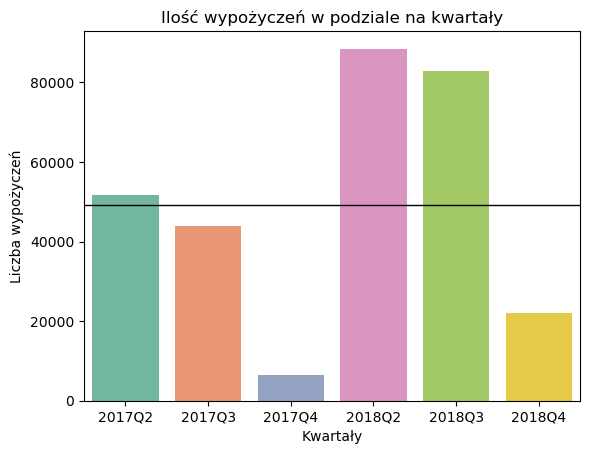

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
sns.set_palette("Set2")
sns.barplot(x=wyp_per_quarter.quarter, y = wyp_per_quarter.bike_num)
plt.title('Ilość wypożyczeń w podziale na kwartały')
plt.xlabel("Kwartały")
plt.ylabel("Liczba wypożyczeń")
plt.axhline(y=srednia_kwartalna,linewidth=1, color='k')

In [265]:
# per month
wyp_per_month = wyp_razem.groupby(["month"])["bike_num"].count().reset_index()
wyp_per_month

,month,bike_num
0,2017-04,3555
1,2017-05,24392
2,2017-06,23701
3,2017-07,18574
4,2017-08,17821
5,2017-09,7635
6,2017-10,6532
7,2017-11,46
8,2018-04,28018
9,2018-05,29087


In [266]:
srednia_miesieczna = wyp_razem.groupby(["month"])["bike_num"].count().reset_index()["bike_num"].mean().round()
srednia_miesieczna

17387.0

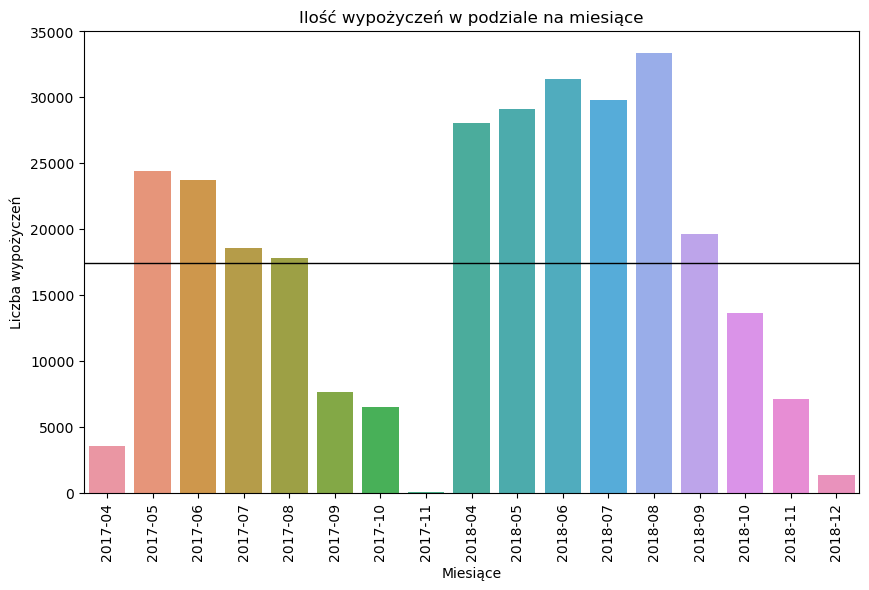

In [267]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_palette(palette=None)
sns.barplot(x=wyp_per_month.month, y = wyp_per_month.bike_num)
plt.title('Ilość wypożyczeń w podziale na miesiące')
plt.xlabel("Miesiące")
plt.ylabel("Liczba wypożyczeń")
ax.xaxis.set_tick_params(rotation=90)
plt.axhline(y=srednia_miesieczna,linewidth=1, color='k')

In [268]:
#by day of the week (Monday=0, Sunday=6)
wyp_razem['week_day'] =  pd.to_datetime(wyp_razem["start_time"]).dt.dayofweek 
wyp_per_day_of_the_week = wyp_razem.groupby(["week_day"])["bike_num"].count().reset_index()
wyp_per_day_of_the_week 

,week_day,bike_num
0,0,43164
1,1,41924
2,2,43511
3,3,42387
4,4,40238
5,5,39911
6,6,44449


In [269]:
srednia_day_of_the_week = wyp_razem.groupby(["week_day"])["bike_num"].count().reset_index()["bike_num"].mean().round()
srednia_day_of_the_week

42226.0

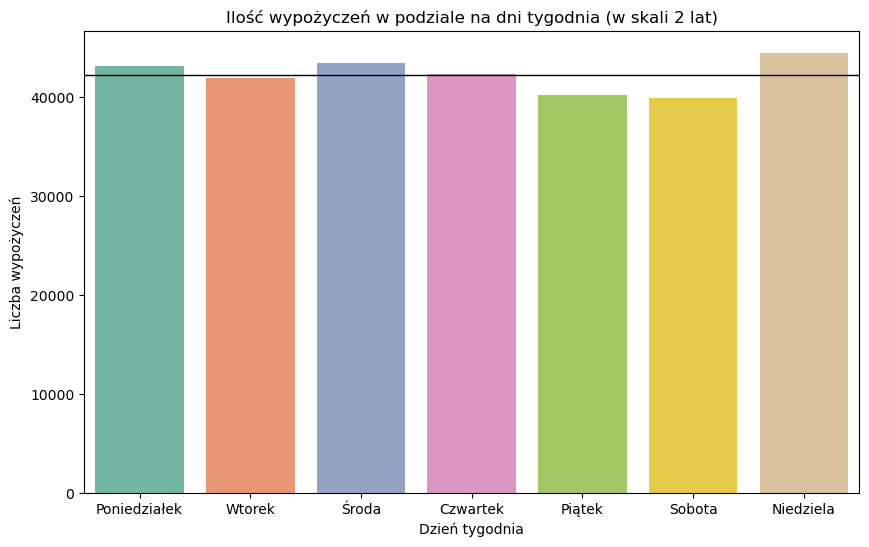

In [270]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x=["Poniedziałek", "Wtorek", "Środa", "Czwartek", "Piątek", "Sobota", "Niedziela"], y = wyp_per_day_of_the_week.bike_num)
plt.title('Ilość wypożyczeń w podziale na dni tygodnia (w skali 2 lat)')
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba wypożyczeń")
plt.axhline(y=srednia_day_of_the_week,linewidth=1, color='k')

In [271]:
# powyższy wykres jest ok, ale zlicza on dość prostolinijnie wypożyczenia w całym badanym okresie (2017-2018) 
# nie uwzględnia on, czy każdy z dni tygodnia występował w badanym okresie równie często
# i ile wypożyczeń miało miejsce średnio w skali tygodnia (powyżej uwzględnia sumę wypożyczeń z 2 lat)
# lets check it out
wyp_razem.head(1)

,bike_num,start_time,end_time,departure,return,duration_sec,trasa,date,month,quarter,week_day
0,58516,2017-05-01 00:26:45,2017-05-01 01:04:49,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,2284,Al. Bolesława Krzywoustego - Al. Bolesława Krz...,2017-05-01,2017-05,2017Q2,0


In [272]:
count_of_week_days_occuring_in_data_period = wyp_razem.groupby(["week_day"])["date"].nunique().reset_index()
count_of_week_days_occuring_in_data_period # tyle razy każdy z dni tygodnia miał miejsce w badanym okresie

,week_day,date
0,0,66
1,1,66
2,2,66
3,3,65
4,4,66
5,5,66
6,6,67


In [273]:
wyp_per_day_of_the_week = wyp_per_day_of_the_week.merge(count_of_week_days_occuring_in_data_period, on = 'week_day', how = 'left')
wyp_per_day_of_the_week

,week_day,bike_num,date
0,0,43164,66
1,1,41924,66
2,2,43511,66
3,3,42387,65
4,4,40238,66
5,5,39911,66
6,6,44449,67


In [274]:
wyp_per_day_of_the_week = wyp_per_day_of_the_week.rename(columns={'bike_num': "sum_in_data_period", "date":"count_of_days_in_data_period"}) 
wyp_per_day_of_the_week["mean_per_day_of_the_week"] = (wyp_per_day_of_the_week["sum_in_data_period"] / wyp_per_day_of_the_week["count_of_days_in_data_period"]).round()
wyp_per_day_of_the_week

,week_day,sum_in_data_period,count_of_days_in_data_period,mean_per_day_of_the_week
0,0,43164,66,654.0
1,1,41924,66,635.0
2,2,43511,66,659.0
3,3,42387,65,652.0
4,4,40238,66,610.0
5,5,39911,66,605.0
6,6,44449,67,663.0


In [275]:
srednia_w_tygodniu = wyp_per_day_of_the_week["mean_per_day_of_the_week"].mean().round()
srednia_w_tygodniu

640.0

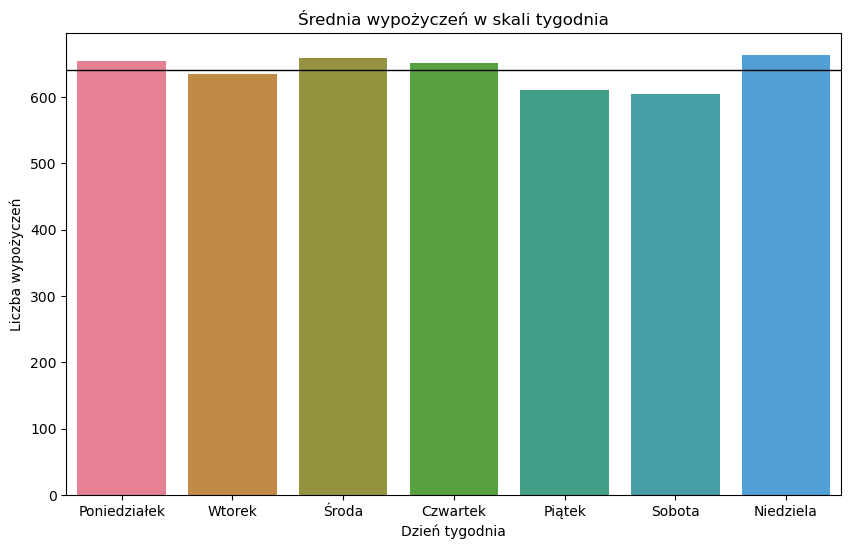

In [276]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_palette("husl", 9)
sns.barplot(x=["Poniedziałek", "Wtorek", "Środa", "Czwartek", "Piątek", "Sobota", "Niedziela"], y = wyp_per_day_of_the_week.mean_per_day_of_the_week)
plt.title('Średnia wypożyczeń w skali tygodnia')
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba wypożyczeń")
plt.axhline(y=srednia_w_tygodniu,linewidth=1, color='k')

## 18. Pokaż średnią liczbę wypożyczeń w podziale na godziny z rozbiciem na to czy to jest weekend czy nie.

In [277]:
wyp_razem.head()

,bike_num,start_time,end_time,departure,return,duration_sec,trasa,date,month,quarter,week_day
0,58516,2017-05-01 00:26:45,2017-05-01 01:04:49,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,2284,Al. Bolesława Krzywoustego - Al. Bolesława Krz...,2017-05-01,2017-05,2017Q2,0
1,58416,2017-05-01 00:26:28,2017-05-01 01:05:08,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,2320,Al. Bolesława Krzywoustego - Al. Bolesława Krz...,2017-05-01,2017-05,2017Q2,0
2,58498,2017-05-01 01:23:07,2017-05-01 03:04:20,Al. Księżnej Jadwigi Śląskiej,Al. Księcia Henryka Pobożnego,6073,Al. Księżnej Jadwigi Śląskiej - Al. Księcia He...,2017-05-01,2017-05,2017Q2,0
3,58389,2017-05-01 06:23:11,2017-05-01 08:25:08,Katowice Rynek,Katowice Rynek,7317,Katowice Rynek - Katowice Rynek,2017-05-01,2017-05,2017Q2,0
4,58520,2017-05-01 09:06:31,2017-05-01 09:07:04,Al. Księżnej Jadwigi Śląskiej,Al. Księżnej Jadwigi Śląskiej,33,Al. Księżnej Jadwigi Śląskiej - Al. Księżnej J...,2017-05-01,2017-05,2017Q2,0


In [278]:
wyp_razem["hour"]=wyp_razem["start_time"].str[11:13] #nowa kolumna z godziną
wyp_razem.head()

,bike_num,start_time,end_time,departure,return,duration_sec,trasa,date,month,quarter,week_day,hour
0,58516,2017-05-01 00:26:45,2017-05-01 01:04:49,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,2284,Al. Bolesława Krzywoustego - Al. Bolesława Krz...,2017-05-01,2017-05,2017Q2,0,00
1,58416,2017-05-01 00:26:28,2017-05-01 01:05:08,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,2320,Al. Bolesława Krzywoustego - Al. Bolesława Krz...,2017-05-01,2017-05,2017Q2,0,00
2,58498,2017-05-01 01:23:07,2017-05-01 03:04:20,Al. Księżnej Jadwigi Śląskiej,Al. Księcia Henryka Pobożnego,6073,Al. Księżnej Jadwigi Śląskiej - Al. Księcia He...,2017-05-01,2017-05,2017Q2,0,01
3,58389,2017-05-01 06:23:11,2017-05-01 08:25:08,Katowice Rynek,Katowice Rynek,7317,Katowice Rynek - Katowice Rynek,2017-05-01,2017-05,2017Q2,0,06
4,58520,2017-05-01 09:06:31,2017-05-01 09:07:04,Al. Księżnej Jadwigi Śląskiej,Al. Księżnej Jadwigi Śląskiej,33,Al. Księżnej Jadwigi Śląskiej - Al. Księżnej J...,2017-05-01,2017-05,2017Q2,0,09


In [279]:
def weekend(x): #funkcja do sprawdzenia czy to weekend c:
    if x < 5:
        return False
    else:
        return True
    
wyp_razem["is_weekend"] = wyp_razem['week_day'].map(lambda x: weekend(x)) #nowa kolumna ze statusem weekendu
wyp_razem.sample(10)

,bike_num,start_time,end_time,departure,return,duration_sec,trasa,date,month,quarter,week_day,hour,is_weekend
164063,58618,2018-09-17 18:10:30,2018-09-17 19:36:37,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,5167,Al. Bolesława Krzywoustego - Al. Bolesława Krz...,2018-09-17,2018-09,2018Q3,0,18,False
162353,58584,2018-09-15 19:23:03,2018-09-15 19:28:43,KTBS – Krasińskiego 14,Plac Sejmu Śląskiego,340,KTBS – Krasińskiego 14 - Plac Sejmu Śląskiego,2018-09-15,2018-09,2018Q3,5,19,True
127475,58878,2018-08-09 13:01:56,2018-08-09 13:06:58,Ligota Dworzec PKP,Skwer Bolesława Szabelskiego,302,Ligota Dworzec PKP - Skwer Bolesława Szabelskiego,2018-08-09,2018-08,2018Q3,3,13,False
171331,58584,2018-10-01 08:46:01,2018-10-01 08:50:58,Katowice Rynek,Politechnika Śląska,297,Katowice Rynek - Politechnika Śląska,2018-10-01,2018-10,2018Q4,0,08,False
73273,58537,2017-08-06 11:54:50,2017-08-06 11:57:19,Giszowiec - Plac Pod Lipami,Giszowiec - Plac Pod Lipami,149,Giszowiec - Plac Pod Lipami - Giszowiec - Plac...,2017-08-06,2017-08,2017Q3,6,11,True
108472,58662,2018-07-22 17:38:13,2018-07-22 18:43:47,Al. Bolesława Krzywoustego,Al. Bolesława Krzywoustego,3934,Al. Bolesława Krzywoustego - Al. Bolesława Krz...,2018-07-22,2018-07,2018Q3,6,17,True
116635,58618,2018-07-30 18:56:42,2018-07-30 19:03:41,Ligota Dworzec PKP,Ligota Dworzec PKP,419,Ligota Dworzec PKP - Ligota Dworzec PKP,2018-07-30,2018-07,2018Q3,0,18,False
67037,58372,2017-07-26 19:26:14,2017-07-26 19:59:56,Dolina 3-ch Stawów,NOSPR Katowice,2022,Dolina 3-ch Stawów - NOSPR Katowice,2017-07-26,2017-07,2017Q3,2,19,False
27122,58861,2018-04-29 23:47:44,2018-04-30 00:10:15,Załęże Skwer S. Barei,Al. Księcia Henryka Pobożnego,1351,Załęże Skwer S. Barei - Al. Księcia Henryka Po...,2018-04-29,2018-04,2018Q2,6,23,True
54344,58822,2018-05-29 17:07:02,2018-05-29 18:31:47,Piotrowice V L.O.,Łętowskiego S.P. nr 27,5085,Piotrowice V L.O. - Łętowskiego S.P. nr 27,2018-05-29,2018-05,2018Q2,1,17,False


In [280]:
wyp_per_hour_and_weekend = wyp_razem.groupby(["hour","is_weekend"])["bike_num"].count().reset_index()
wyp_per_hour_and_weekend

,hour,is_weekend,bike_num
0,00,False,1686
1,00,True,1649
2,01,False,964
3,01,True,1215
4,02,False,613
5,02,True,776
6,03,False,430
7,03,True,582
8,04,False,362
9,04,True,319


In [281]:
day_count_in_period = wyp_razem["date"].nunique() # w badanym okresie jest 462 unikalnych dni
day_count_in_period

462

In [282]:
# aby na wykresie niebyło sumy wypożyczeń dla danej godziny a średnia, podzielimy wypożyczenia o danej godzinie przez liczbe dni
wyp_per_hour_and_weekend["bike_num"] = (wyp_per_hour_and_weekend["bike_num"] / day_count_in_period).round()
wyp_per_hour_and_weekend

,hour,is_weekend,bike_num
0,00,False,4.0
1,00,True,4.0
2,01,False,2.0
3,01,True,3.0
4,02,False,1.0
5,02,True,2.0
6,03,False,1.0
7,03,True,1.0
8,04,False,1.0
9,04,True,1.0


In [283]:
srednia_na_godzine = wyp_per_hour_and_weekend["bike_num"].mean().round()
srednia_na_godzine

13.0

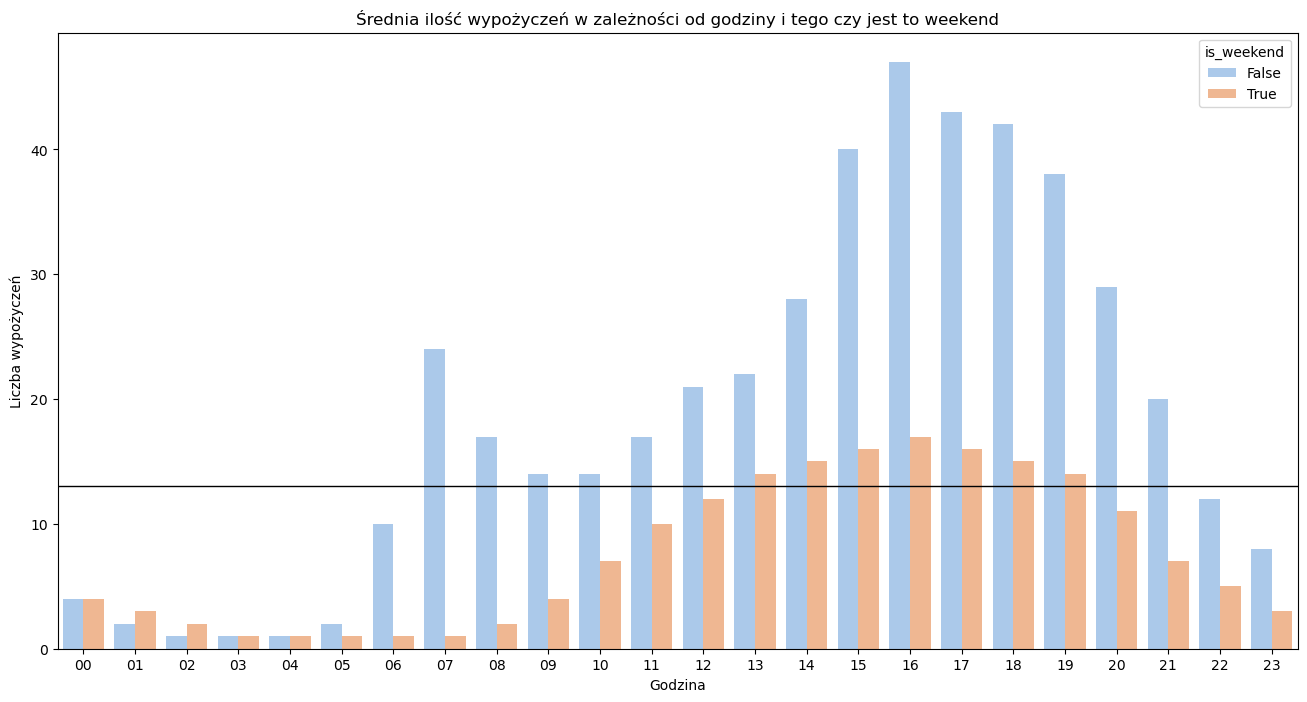

In [284]:
plt.figure(figsize = (16, 8))
sns.set_palette("pastel")
sns.barplot(x = wyp_per_hour_and_weekend.hour, y = wyp_per_hour_and_weekend.bike_num, hue = wyp_per_hour_and_weekend.is_weekend)
plt.title('Średnia ilość wypożyczeń w zależności od godziny i tego czy jest to weekend')
plt.xlabel("Godzina")
plt.ylabel("Liczba wypożyczeń")
plt.axhline(y=srednia_na_godzine,linewidth=1, color='k')